In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from datetime import datetime

In [2]:
from os import listdir
hourlydata_df = pd.DataFrame()
path = r"C:\Users\Ula\Desktop\School\Group project\blocks"
hour_column_name = "hour_period"
for f in listdir(path):
    # Read csv to a dataframe
    temp_df = pd.read_csv(f"{path}/{f}")
    # Add column that allows you to know which hour period belongs to
    temp_df[hour_column_name] = f.split(".csv")[0]
    # Merge with previous dataframe    
    hourlydata_df = pd.concat([hourlydata_df, temp_df])

In [3]:
hourlydata_df

,LCLid,tstp,energy(kWh/hh),hour_period
0,MAC000077,2011-12-10 11:00:00.0000000,0.059,block_106
1,MAC000077,2011-12-10 11:30:00.0000000,0.12,block_106
2,MAC000077,2011-12-10 12:00:00.0000000,0.117,block_106
3,MAC000077,2011-12-10 12:30:00.0000000,0.118,block_106
4,MAC000077,2011-12-10 13:00:00.0000000,0.172,block_106
...,...,...,...,...
1449704,MAC005561,2014-02-27 22:00:00.0000000,0.361,block_79
1449705,MAC005561,2014-02-27 22:30:00.0000000,0.088,block_79
1449706,MAC005561,2014-02-27 23:00:00.0000000,0.087,block_79
1449707,MAC005561,2014-02-27 23:30:00.0000000,0.066,block_79


In [4]:
hourlydata_df['LCLid'].nunique()

450

In [5]:
#adding the date and time columns

hourlydata_df['tstp']= pd.to_datetime(hourlydata_df['tstp'], format='%Y-%m-%d %H:%M:%S.%f')

In [6]:
hourlydata_df['date'] = [d.date() for d in hourlydata_df['tstp']]
hourlydata_df['time'] = [d.time() for d in hourlydata_df['tstp']]
hourlydata_df["time"]=hourlydata_df["time"].astype(str)

In [7]:
hourlydata_df.rename(columns={'energy(kWh/hh)':'energy'}, inplace = True)

In [8]:
hourlydata_df['energy'] = pd.to_numeric(hourlydata_df['energy'],errors = 'coerce')

In [9]:
hourlydata_df

,LCLid,tstp,energy,hour_period,date,time
0,MAC000077,2011-12-10 11:00:00,0.059,block_106,2011-12-10,11:00:00
1,MAC000077,2011-12-10 11:30:00,0.120,block_106,2011-12-10,11:30:00
2,MAC000077,2011-12-10 12:00:00,0.117,block_106,2011-12-10,12:00:00
3,MAC000077,2011-12-10 12:30:00,0.118,block_106,2011-12-10,12:30:00
4,MAC000077,2011-12-10 13:00:00,0.172,block_106,2011-12-10,13:00:00
...,...,...,...,...,...,...
1449704,MAC005561,2014-02-27 22:00:00,0.361,block_79,2014-02-27,22:00:00
1449705,MAC005561,2014-02-27 22:30:00,0.088,block_79,2014-02-27,22:30:00
1449706,MAC005561,2014-02-27 23:00:00,0.087,block_79,2014-02-27,23:00:00
1449707,MAC005561,2014-02-27 23:30:00,0.066,block_79,2014-02-27,23:30:00


In [10]:
#grouping the data by mean

grouped_hh=hourlydata_df.groupby(['time']).energy.mean().reset_index()

In [11]:
grouped_hh.head()

,time,energy
0,00:00:00,0.160051
1,00:30:00,0.143490
2,01:00:00,0.126374
3,01:30:00,0.113764
4,02:00:00,0.106107


In [12]:
grouped_hh.shape

(358, 2)

In [13]:
grouped_hh["time"]= grouped_hh["time"].astype(str)

In [14]:
grouped_hh=grouped_hh.dropna()

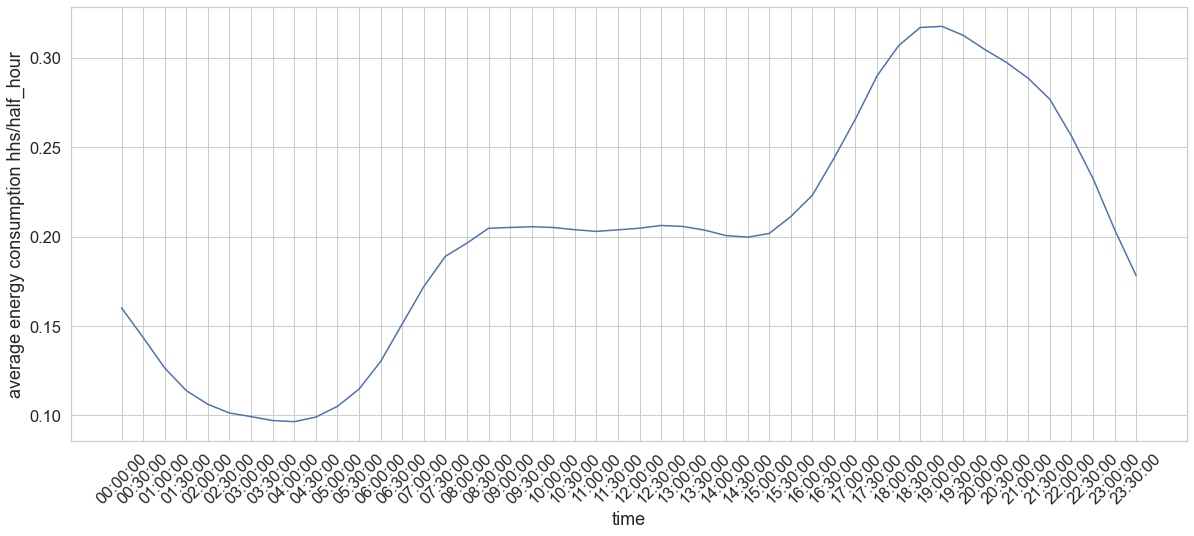

In [15]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
figure(figsize=(20,8))
sns.lineplot(data=grouped_hh, x="time", y="energy")
plt.ylabel('average energy consumption hhs/half_hour')
plt.xticks(rotation=45)
plt.show()

Energy usage is lowest during the night and highest in the late afternoon/evening with a peak around 19.

In [16]:
info_hhs=pd.read_csv('informations_households.csv')
info_hhs.head()

,LCLid,stdorToU,Acorn,Acorn_grouped,file
0,MAC005492,ToU,ACORN-,ACORN-,block_0
1,MAC001074,ToU,ACORN-,ACORN-,block_0
2,MAC000002,Std,ACORN-A,Affluent,block_0
3,MAC003613,Std,ACORN-A,Affluent,block_0
4,MAC003597,Std,ACORN-A,Affluent,block_0


In [17]:
hourlydata_df=pd.merge(hourlydata_df, info_hhs[['LCLid', 'Acorn', 'Acorn_grouped', 'stdorToU']], on='LCLid')

In [18]:
hourlydata_df.head()

,LCLid,tstp,energy,hour_period,date,time,Acorn,Acorn_grouped,stdorToU
0,MAC000077,2011-12-10 11:00:00,0.059,block_106,2011-12-10,11:00:00,ACORN-Q,Adversity,Std
1,MAC000077,2011-12-10 11:30:00,0.120,block_106,2011-12-10,11:30:00,ACORN-Q,Adversity,Std
2,MAC000077,2011-12-10 12:00:00,0.117,block_106,2011-12-10,12:00:00,ACORN-Q,Adversity,Std
3,MAC000077,2011-12-10 12:30:00,0.118,block_106,2011-12-10,12:30:00,ACORN-Q,Adversity,Std
4,MAC000077,2011-12-10 13:00:00,0.172,block_106,2011-12-10,13:00:00,ACORN-Q,Adversity,Std


In [19]:
hourlydata_df['Acorn_grouped'].value_counts()

Affluent       4586037
Comfortable    4584740
Adversity      4420730
Name: Acorn_grouped, dtype: int64

In [20]:
hourlydata_df['stdorToU'].value_counts()

Std    7587074
ToU    6004433
Name: stdorToU, dtype: int64

In [21]:
grouped_tariff=hourlydata_df.groupby(['time', 'stdorToU']).energy.mean().reset_index()

In [22]:
grouped_tariff.head()

,time,stdorToU,energy
0,00:00:00,Std,0.165238
1,00:00:00,ToU,0.153497
2,00:30:00,Std,0.150540
3,00:30:00,ToU,0.134578
4,01:00:00,Std,0.131541


In [23]:
grouped_tariff=grouped_tariff.dropna()

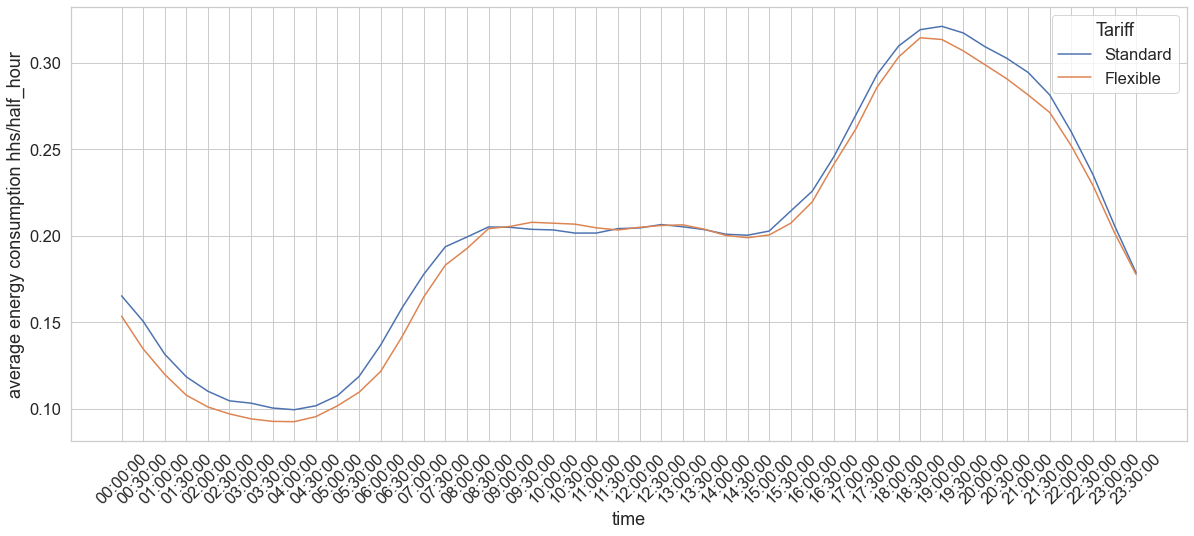

In [24]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
figure(figsize=(20,8))
sns.lineplot(data=grouped_tariff, x="time", y="energy", hue='stdorToU')
plt.ylabel('average energy consumption hhs/half_hour')
plt.legend(title='Tariff', loc='upper right', labels=['Standard', 'Flexible'])
plt.xticks(rotation=45)
plt.show()

In [25]:
grouped_acorn=hourlydata_df.groupby(['time', 'Acorn_grouped']).energy.mean().reset_index()

In [26]:
grouped_acorn.head()

,time,Acorn_grouped,energy
0,00:00:00,Adversity,0.142760
1,00:00:00,Affluent,0.179569
2,00:00:00,Comfortable,0.157201
3,00:30:00,Adversity,0.126029
4,00:30:00,Affluent,0.165906


In [27]:
grouped_acorn=grouped_acorn.dropna()

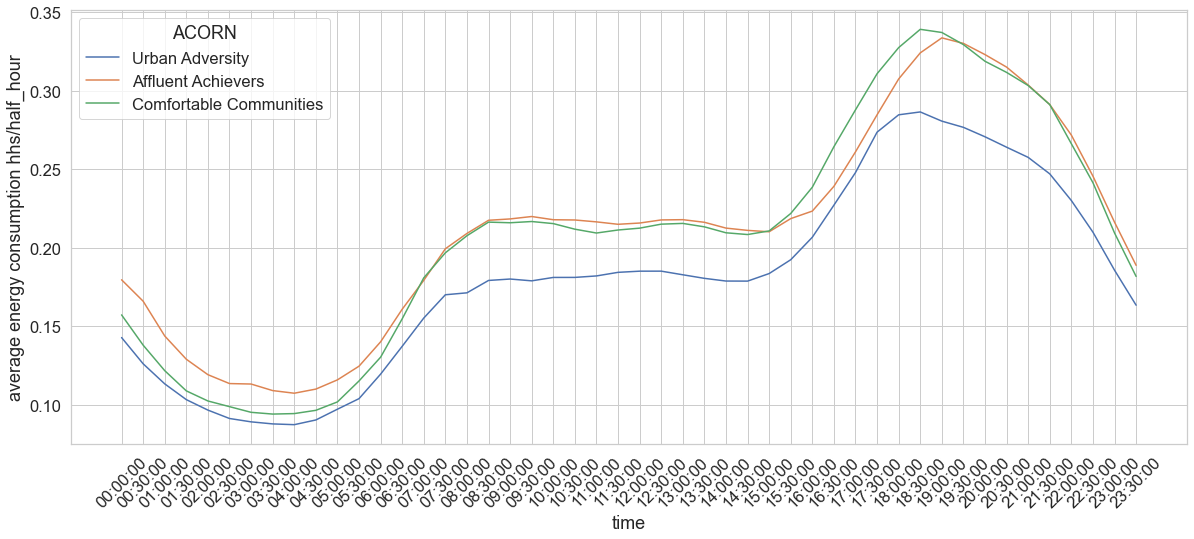

In [31]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
figure(figsize=(20,8))
sns.lineplot(data=grouped_acorn, x="time", y="energy", hue='Acorn_grouped')
plt.ylabel('average energy consumption hhs/half_hour')
plt.legend(title='ACORN', loc='upper left', labels=['Urban Adversity', 'Affluent Achievers', 'Comfortable Communities'])
plt.xticks(rotation=45)
plt.show()